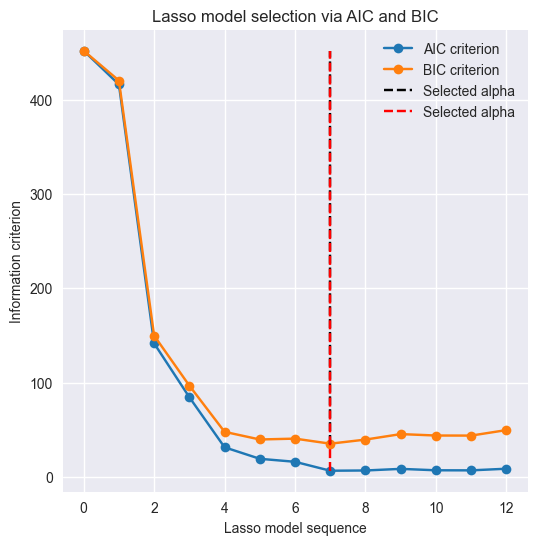

In [6]:
# 导入操作系统库
import os
# 更改工作目录
os.chdir(r"D:\softwares\applied statistics\pythoncodelearning\chap1\sourcecode")
# 导入基础计算库
import numpy as np
# 导入绘图库
import matplotlib.pyplot as plt
# 导入数据集获取工具
from sklearn.datasets import load_diabetes
# 导入标准化处理工具
from sklearn.preprocessing import StandardScaler
# 导入LassoCV模型
from sklearn.linear_model import LassoLarsIC
# 导入管道操作
from sklearn.pipeline import make_pipeline
# 导入绘图库中的字体管理包
from matplotlib import font_manager
# 实现中文字符正常显示
font = font_manager.FontProperties(fname=r"C:\Windows\Fonts\SimKai.ttf")
# 使用seaborn风格绘图
plt.style.use("seaborn-v0_8")
# 导入数据集
X, y = load_diabetes(return_X_y=True, as_frame=True)
# 样本量
n_samples = X.shape[0]
# 构建模型
lasso_lars_ic = make_pipeline(
    StandardScaler(), 
    LassoLarsIC(criterion="aic")
)
# 模型拟合
lasso_lars_ic.fit(X, y)
# 重新定义信息准则
def zou_et_al_criterion_rescaling(criterion, n_samples, noise_variance):
    """Rescale the information criterion to follow the definition of Zou et al."""
    return criterion - n_samples * np.log(2 * np.pi * noise_variance) - n_samples
# 缩放后的AIC
aic_criterion = zou_et_al_criterion_rescaling(
    lasso_lars_ic[-1].criterion_,
    n_samples,
    lasso_lars_ic[-1].noise_variance_,
)
# 选出AIC最小对应的那个alpha所在的下标
index_alpha_path_aic = np.flatnonzero(
    lasso_lars_ic[-1].alphas_ == lasso_lars_ic[-1].alpha_
)[0]
# 不用重新拟合模型，直接修改参数即可，这就是pipeline的好处
lasso_lars_ic.set_params(
    lassolarsic__criterion="bic"
)
# 模型拟合
lasso_lars_ic.fit(X, y)
# 缩放后的BIC
bic_criterion = zou_et_al_criterion_rescaling(
    lasso_lars_ic[-1].criterion_,
    n_samples,
    lasso_lars_ic[-1].noise_variance_,
)
# 选出BIC最小对应的那个alpha所在的下标
index_alpha_path_bic = np.flatnonzero(
    lasso_lars_ic[-1].alphas_ == lasso_lars_ic[-1].alpha_
)[0]
# 开始绘图
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(
    aic_criterion, 
    color="tab:blue", 
    marker="o", 
    label="AIC criterion"
)
ax.plot(
    bic_criterion, 
    color="tab:orange", 
    marker="o", 
    label="BIC criterion"
)
ax.vlines(
    index_alpha_path_bic,
    bic_criterion.min(),
    bic_criterion.max(),
    color="black",
    linestyle="--",
    label="Selected alpha",
)
ax.vlines(
    index_alpha_path_aic,
    aic_criterion.min(),
    aic_criterion.max(),
    color="red",
    linestyle="--",
    label="Selected alpha",
)
# 显示图例
ax.legend()
ax.set_ylabel("Information criterion")
ax.set_xlabel("Lasso model sequence")
ax.set_title("Lasso model selection via AIC and BIC")
plt.show()
fig.savefig("../codeimage/code14.pdf")
